
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь").**


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [7]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]

In [9]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [10]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- **577 мужчин и 314 женщин**

In [25]:
print(f'Мужчин на борту было {data[data["Sex"]=="male"]["Name"].count()}, а женщин {data[data["Sex"]=="female"]["Name"].count()}')

Мужчин на борту было 577, а женщин 314


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- **108**
- 112
- 125

In [30]:
for i in np.unique(data["Pclass"]):
    print(f'Пассажиров {i} класса {data[data["Pclass"]==i]["Name"].count()}')
for i in np.unique(data["Pclass"]):
    print(f'Мужчин в {i} классе было {data[(data["Pclass"]==i) & (data["Sex"]=="male")]["Name"].count()}')
    print(f'Женщин в {i} классе было {data[(data["Pclass"]==i) & (data["Sex"]=="female")]["Name"].count()}')

Пассажиров 1 класса 216
Пассажиров 2 класса 184
Пассажиров 3 класса 491
Мужчин в 1 классе было 122
Женщин в 1 классе было 94
Мужчин в 2 классе было 108
Женщин в 2 классе было 76
Мужчин в 3 классе было 347
Женщин в 3 классе было 144


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- **Медиана – 14.45, стандартное отклонение – 49.69**
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [32]:
m = data["Fare"].median()
s = data["Fare"].std()
print(f'Медиана {m:.2f}, стандартное отклонение {s:.2f}')

Медиана 14.45, стандартное отклонение 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- **40.6% среди молодых и 22.7% среди старых**
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [38]:
survived30 = data[data["Age"]<30]["Survived"].sum()
survived60 = data[data["Age"]>60]["Survived"].sum()
sur30_ratio = survived30 /  data[data["Age"]<30]["Name"].count()
sur60_ratio = survived60 /  data[data["Age"]>60]["Name"].count()
print(f'Доля выживших младше 30 {sur30_ratio*100:.1f}%; доля выживших старше 60 {sur60_ratio*100:.1f}%')

Доля выживших младше 30 40.6%; доля выживших старше 60 22.7%


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- **18.9% среди мужчин и 74.2% среди женщин**

In [40]:
survived_male = data[data["Sex"]=="male"]["Survived"].sum()
survived_female = data[data["Sex"]=="female"]["Survived"].sum()
sur_male_ratio = survived_male /  data[data["Sex"]=="male"]["Name"].count()
sur_female_ratio = survived_female /  data[data["Sex"]=="female"]["Name"].count()
print(f'Доля выживших мужчин {sur_male_ratio*100:.1f}%; доля выживших женщин {sur_female_ratio*100:.1f}%')

Доля выживших мужчин 18.9%; доля выживших женщин 74.2%


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- **William**
- John

In [50]:
def name_extract(name):
    dot_ind = name.index(".")
    name = name[dot_ind+2:].split()[0]
    return name

median_name = data[data["Sex"]=="male"]["Name"].map(name_extract).value_counts()
print(median_name)

William    35
John       25
George     14
Charles    13
Thomas     13
           ..
Paul        1
Edwin       1
Herbert     1
Emile       1
Stjepan     1
Name: Name, Length: 287, dtype: int64


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- **Да** 
- Нет

Средний возраст погибших и выживших


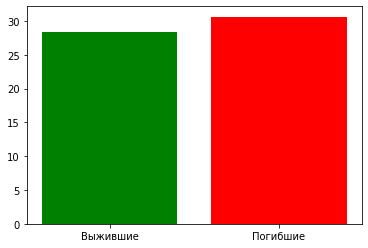

Средняя цена билета погибших и выживших


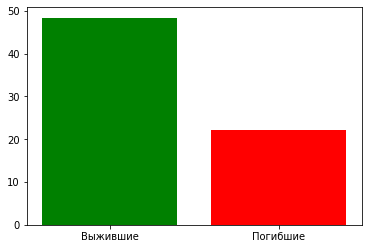

In [65]:
import matplotlib.pyplot as plt

ages_sur = data[data["Survived"]==1]["Age"].mean()
ages_dead = data[data["Survived"]==0]["Age"].mean()
ticket_sur = data[data["Survived"]==1]["Fare"].mean()
ticket_dead = data[data["Survived"]==0]["Fare"].mean()


print("Средний возраст погибших и выживших")
plot1=plt.bar(["Выжившие", "Погибшие"], [ages_sur, ages_dead], color=["Green", "Red"])
plt.show()

print("Средняя цена билета погибших и выживших")
plot2=plt.bar(["Выжившие", "Погибшие"], [ticket_sur, ticket_dead], color=["Green", "Red"])


**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- **В среднем мужчины 1-го класса старше 40 лет**
- В среднем женщины 1-го класса старше 40 лет
- **Мужчины всех классов в среднем старше женщин того же класса**
- **В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса**

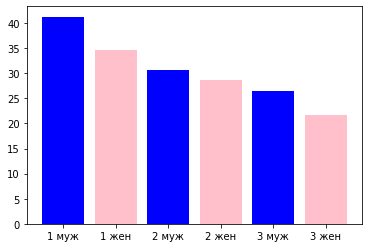

In [73]:
man_age=[]
woman_age=[]
for i in np.unique(data["Pclass"]):
    man_age.append(data[(data["Pclass"]==i) & (data["Sex"]=="male")]["Age"].mean())
    woman_age.append(data[(data["Pclass"]==i) & (data["Sex"]=="female")]["Age"].mean())

plot1=plt.bar(["1 муж", "1 жен","2 муж", "2 жен","3 муж", "3 жен"], [man_age[0], woman_age[0],
man_age[1],woman_age[1],man_age[2],woman_age[2]], color=["Blue", "Pink"])
plt.show()